# Project 4 Project
## Recommendations of Movies
![First Picture](pictures/Movie Recommendation Pict.jpg)

## Overview 
There are more than millions of movies made since first introduced. The normal person however has limited time to watch movies in their free time more than ever. To help consumers save time and money and companies give consumers the best experience, recommendations are made to make selection easier. To make these recommendations, we will be using a dataset of roughly **10,000 movie entries** to predict that a user would rate a given movie higher than those users with similar reviews on said movie. By comparing similar users and movie ratings, we should be able to recommend movies accurately. 

We attempt to use **memory-based modeling** and **model-based modeling** to fit the training set. **Peterson's similarity** appeared to perform the best for the Memory based models and was used to compare the others. Grid search was also used for both types to find the best combinations for each of the models. The final model used was the KNN Baseline algorithm

Lastly, there were **two ways** to recommend to users the top 5 movies. <br>
**First** was an artificial ranking given by the position and weighing them the user-based model and the item-based model. **The sum of the two ranks is their combined rank and is compared to the others to recommend.** <br>
The **second** way is to take the corresponding rank of the predicted values from the models and take **the average of the ratings from their sum**. The second way appear to be a better prediction than the previous models with a small difference in RSME. 

## Buiness Understanding

There has been a boom in streaming services and thousands of movies for consumers to watch. Netflix has over **4,000 movies** and Prime Video has roughly **7,000 movies** not considering that these big streaming services have their original movies as well. To compete with other streaming platforms, the user experience should be the focus of these companies. <br>
**One aspect to look into is the recommendation system they have on their website that would recommend movies to the users based on their movies, trending movies, and popular movies**. The user experience needs to entice old users to stay and welcome new users to join and begin watching movies. 

Recommendation works well in most cases. On average, better-rated movies perform well and people will actively look for them before making their choice to watch said movie. For example, **70% of videos** watched are made from their recommendations. 

## Data Understanding
The dataset was compiled by the **Grouplens** research group and the source of that data comes MovieLens. MovieLens is a movie recommendation service that has **9,742 movies** and **100,836 ratings** from **610 users**. The dataset was updated on September 26, 2018. There are three datasets but will only be needing two of them, the ratings and the movies. 

The movie dataset has the movie IDs, titles, and genres for the movie. This was used mainly for conversions but could potentially be used for the genres as it was explored for a bit. 
Ratings have the most pieces of information as it has ratings and timestamps. The ratings were scaled from **0 to 5 with a .5 step**. 

Exploring the datasets have some interesting facts concerning the dataset. For one, the distribution is slightly skewed left with the **mean** rating happening to be roughly **3.5**. There are a handful of users that contributes to the reviews given which may have bias depending on who the user was. **Most movies were not rated below 3** so it might be difficult to determine a good movie to recommend.  

In [1]:
### Read all the dataset and load them in with proper names ###
### Links were not used for this project ###

import pandas as pd
import helper as hp
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

# links = pd.read_csv('ml-latest-small/links.csv') 

### Exploration Information
* There are 9,742 movies in the dataset
* There are 100,836 ratings and 610 users 
* There are 58 users that make up the 3,683 tags added
* Genres are separated by | if there are more than one


In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


## Data Preperations
When exploring the dataset, none of the data was missing and other than the timestamps, all columns were usable. 

In [4]:
### Remove the timestamp column ### 
ratings.drop('timestamp', axis = 1, inplace = True)
global movie_id_list, user_list
movie_id_list = movies.movieId.unique()
user_list = ratings.userId.unique()

In [5]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

### Reader to use surprise libraries and create training set and testset ### 
reader = Reader()
data = Dataset.load_from_df(ratings,reader)
trainset, testset = train_test_split(data, test_size=0.3, random_state= 69)

In [6]:
### Necessary libraries for modeling and validating and testing accuracy of the models ### 
from surprise.prediction_algorithms import knns
from surprise.model_selection import cross_validate
from surprise import accuracy

## Method
We used surprise libraries to create a recommendation system using different algorithms. The Memory-Based models are **KnnBasic**, **KnnBaseline**, and **KnnWithMeans**. The Model-based modeling algorithm is **SVD or Singular Value decomposition**. After finding the best base model, a grid search is used to find the best parameters. We also tried to use different similarity conditions to see if that also improves the model. 

### Baseline Model with KNN Baseline 
A baseline model to compare the model if it is improving. 
KnnBasic, a memory based method was used with cosine similarity comparison. 

In [7]:
sim_cos = {"name": "cosine", "user_based": True}
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)
basic_pred = basic.test(testset)
print(accuracy.rmse(basic_pred))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9819
0.9818952607403942


#### Baseline Evaulation
The rating are roughly 1 point off which is pretty large considering that the range of ratings are from 1 to 5. 
We will atttempt to improve on the accuracy of the model by using different methods and using grid search to look for the most optimal parameters.

### Memory Based Methods 
Three different variation of KNN with all the cosine similarity to compare and all user based for these models. <br>
**Cosine similarity was shown to be the better than the common peterson similarity**. 

#### KnnBasic

In [8]:
sim_cosine = {"name": "cosine", "user_based": True}

basic_pearson = knns.KNNBasic(sim_options=sim_cosine, random_state = 69)
cv_basic = cross_validate(basic_pearson, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)['test_rmse'].mean()
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)

print('Average Cross Validate RMSE Score: ', cv_basic)
print('Testset RSME Score: ',accuracy.rmse(predictions))   

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Average Cross Validate RMSE Score:  0.978325228237377
RMSE: 0.9819
Testset RSME Score:  0.9818952607403942


#### Knn With Means

In [9]:
knn_means = knns.KNNWithMeans(sim_options=sim_cosine, random_state = 69)
cv_means = cross_validate(knn_means, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)['test_rmse'].mean()
knn_means.fit(trainset)
predictions = knn_means.test(testset)

print('Average Cross Validate RMSE Score: ', cv_means)
print('Testset RSME Score: ',accuracy.rmse(predictions)) 

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Average Cross Validate RMSE Score:  0.9061738873626065
RMSE: 0.9103
Testset RSME Score:  0.910278017316939


#### Knn Baseline 

In [10]:
knn_baseline = knns.KNNBaseline(sim_options=sim_cosine, random_state = 69)
cv_baseline = cross_validate(knn_baseline, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)['test_rmse'].mean()
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

print('Average Cross Validate RMSE Score: ', cv_baseline)
print('Testset RSME Score: ',accuracy.rmse(predictions)) 

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8883
0.8882986936389531
Average Cross Validate RMSE Score:  0.8846043247765069
RMSE: 0.8883
Testset RSME Score:  0.8882986936389531


The **KnnBaseline** performed the best out of all the models for the memory based algorithm. 

### Model Based Method

#### SVD algoritm
Find the best parameters for SVD algorithms

In [11]:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV

# params = {'n_factors': [20, 50, 100],
#          'reg_all': [0.02, 0.05, 0.1],
#           'lr_all': [.001, .002, .003, .004, .005],
#          'random_state':[69]
#          }
# g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
# g_s_svd.fit(data)
# g_s_svd.best_params

#  {'rmse': {'n_factors': 100,
#   'reg_all': 0.05,
#   'lr_all': 0.005,
#   'random_state': 69},
#  'mae': {'n_factors': 100,
#   'reg_all': 0.05,
#   'lr_all': 0.005,
#   'random_state': 69}}

In [12]:
best_svd = SVD(n_factors= 20, reg_all = 0.1, random_state = 69)
cv_svd = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)['test_rmse'].mean()
best_svd.fit(trainset)
svd_pred = best_svd.test(testset)

print('Average Cross Validate RMSE Score: ', cv_svd)
print('Testset RSME Score: ',accuracy.rmse(svd_pred)) 

Average Cross Validate RMSE Score:  0.8757490252608563
RMSE: 0.8794
Testset RSME Score:  0.8793716488892641


### KnnBaseline vs SVD
Both KnnBaseline and SVD performed the best when modelling so we need to determine which will be used for the final model. A gridsearch is used to see if there is a better combination of parameters to use. 

In [13]:
# clf = knns.KNNBaseline(sim_options=sim_pearson)
# params = {'k':[10, 20, 30, 40, 50],
#           'min_k': [1, 2, 3, 4],
#           'random_state':[69]
#          }
# g_s_baseline = GridSearchCV(KNNBaseline,param_grid=params,n_jobs=-1)
# g_s_baseline.fit(data)
# g_s_baseline.best_params

In [14]:
sim_pearson = {"name": "pearson", "user_based": True}
knn_baseline = knns.KNNBaseline(k = 30, min_k = 4,sim_options=sim_pearson, random_state = 69)
cv_baseline_best = cross_validate(knn_baseline, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)['test_rmse'].mean()
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print('Average Cross Validate RMSE Score: ', cv_baseline_best)
print('Testset RSME Score: ',accuracy.rmse(predictions)) 

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Average Cross Validate RMSE Score:  0.8748953054913011
RMSE: 0.8776
Testset RSME Score:  0.8776019532148854


**Knn Baseline** perform **slightly better** than the SVD method so we will use that for our model.

In [15]:
### Cases ###
# 1. A new user is detected and display top 5 movies from the current ratings. 
# Does not use model since there is nothing to go off from 
# user_top_5(review_df= ratings)

# 2. User exist and have movies watched
# Return the list of movies with the ranking. 
top_5_1 = hp.user_top_5(knn_baseline,ratings, user_id = 3, movies= movies)
top_5_1_title = hp.id_title([ID[0] for ID in top_5_1[0:5]], movies)

# 3. User exist and have movies watched
# Return the list of movies with the ranking. 
top_5_593 = hp.user_top_5(knn_baseline,ratings, user_id = 593, movies= movies)
top_5_593_title = hp.id_title([ID[0] for ID in top_5_593[0:5]], movies)

top_5_1_title, top_5_593_title

(254     Léon: The Professional (a.k.a. The Professiona...
 596            Ghost in the Shell (Kôkaku kidôtai) (1995)
 828                                 Reservoir Dogs (1992)
 1939                                   Matrix, The (1999)
 2226                                    Fight Club (1999)
 Name: title, dtype: object,
 585     Wallace & Gromit: The Best of Aardman Animatio...
 976                             Cyrano de Bergerac (1990)
 2410                              Last Detail, The (1973)
 9301                             Captain Fantastic (2016)
 9618     Three Billboards Outside Ebbing, Missouri (2017)
 Name: title, dtype: object)

## Item to Item Comparisons
There are a fair amount of movies that the system recommends. 
In order to help filter more of the movies out, we will use the data provided by the movie dataset. 
Speciafially, we will use the genre columns to see if we can help narrow down the movies even further.

In [16]:
### Train another model but item to item comparison instead ###

sim_pearson = {"name": "pearson", "user_based": False}
knn_baseline_item = knns.KNNBaseline(k = 30, min_k = 4,sim_options=sim_pearson, random_state = 69)
knn_baseline_item.fit(trainset)
predictions = knn_baseline_item.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8890
0.8889934058130716


## User Example 1 Recommendation
Example of the model working to provide recommendation based on the user given.
Both of the graphs are from the model's prediction with the watched movies removed. 
Id is still used for readabilty. 

### Example Graph comparison

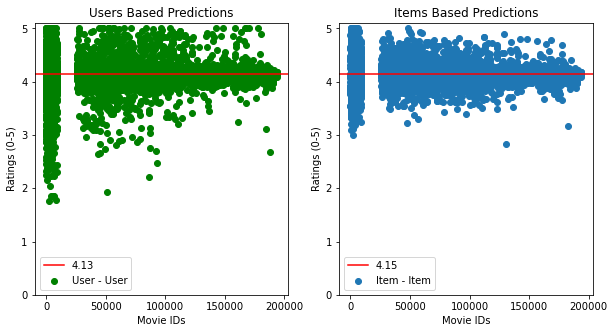

In [17]:
import matplotlib.pyplot as plt
import numpy as np

user_user = hp.user_top_5(user_id = 1, model = knn_baseline, review_df = ratings, movies = movies)        ## The list of movies with the best model
item_item = hp.user_top_5(user_id = 1, model = knn_baseline_item, review_df = ratings, movies = movies)   ## The list of movies with the best model based off items
x_1 = [ID[0] for ID in user_user]   ## All movie id numbers predicted
x_2 = [ID[0] for ID in item_item]   ## All movie id numbers predicted from item based 
y_1 = [ID[1] for ID in user_user]   ## Movie Ratings from user based model
y_2 = [ID[1] for ID in item_item]   ## Movie Ratings from item based model

fig, ax = plt.subplots(ncols= 2, figsize = (10,5))

ax[0].set_title('Users Based Predictions')
ax[0].set_xlabel('Movie IDs')
ax[0].set_ylabel('Ratings (0-5)')
ax[0].set_ylim(0, 5.1)
ax[0].scatter(x_1, y_1, label = 'User - User', color = 'green');
ax[0].axhline(np.mean(y_2), color = 'red',label= round(np.mean(y_1), 2))
ax[0].legend();

ax[1].set_title('Items Based Predictions')
ax[1].set_ylim(0, 5.1)
ax[1].set_ylabel('Ratings (0-5)')
ax[1].set_xlabel('Movie IDs')
ax[1].scatter(x_2, y_2, label = 'Item - Item');
ax[1].axhline(np.mean(y_2), color = 'red', label= round(np.mean(y_2), 2))
ax[1].legend();

### Comparison Analysis
From the predicted ratings for user 1, we can see **a slight difference** in user similarity vs item similarity between movies. Interestingly, the item comparison has all the movies rated above three which goes inside with user 1 trend on rating movies. User 1 doesn't seem so **rate movies lower than three** often and therefore most movies would be rated similarly. Due to the number of users, there is a bigger disparity between users with the movies they watched naturally. 


In [18]:
ratings['rating'].loc[ratings['userId'] == 1].value_counts()

5.0    124
4.0     76
3.0     26
2.0      5
1.0      1
Name: rating, dtype: int64

In [70]:
### Print out the results from the models ###

print('Movies from User Filter')
for item in user_user[0:5]:
    print(movies['title'].loc[movies['movieId'] == item[0]].values)
print('Movies from Movie Filter')
for item in item_item[0:5]:
    print(movies['title'].loc[movies['movieId'] == item[0]].values)

Movies from User Filter
['Hoop Dreams (1994)']
['Three Colors: White (Trzy kolory: Bialy) (1994)']
['Shawshank Redemption, The (1994)']
['In the Name of the Father (1993)']
['Shadowlands (1993)']
Movies from Movie Filter
['Shawshank Redemption, The (1994)']
['Ghost in the Shell (Kôkaku kidôtai) (1995)']
['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)']
['Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)']
['Cool Hand Luke (1967)']


### Individual Results 
The **Top movies** for these two prediction are as follows.

| User Filter                                       | Movie Filter                                                                  |
|---------------------------------------------------|-------------------------------------------------------------------------------|
| 'Hoop Dreams (1994)'                              | **'Shawshank Redemption, The (1994)'**                                            |
| 'Three Colors: White (Trzy kolory: Bialy) (1994)' | 'Ghost in the Shell (Kôkaku kidôtai) (1995)'                                  |
| **'Shawshank Redemption, The (1994)'**               | 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)' |
| 'In the Name of the Father (1993)'                | 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)'                               |
| 'Shadowlands (1993)'                              | 'Cool Hand Luke (1967)'                                                       |



The problem would be how to recommend just five movies with many movies to choose from. <br> 
**For user 1**, there were multiple movies rated 5 but for the sake of giving recommendations, we need a way to pick and choose the best for the user. Currently, due to the sort functions, it was **sorted by the movie ID number** which won't give the best recommendation possible. To resolve this, **we will be using the item-based model to help filter out** even further.

## Next Step
We created two models to help with filtering out the movies.
One recommended movies based on the **similarities of the users** and how they rated other movies. The second recommends movies based on the **similarities of movies** that the users have seen and rated them. 

My first attempt was to use a ranking system based on their position in the list to both of the lists. Then the sum of that rank is taken and the lowest values were suggested to user 1. 

In [25]:
final_df = hp.create_ranked_df(user_user, item_item, movies)
final_df['Movie Id'][0:5].values

array(['Shawshank Redemption, The (1994)',
       'Ghost in the Shell (Kôkaku kidôtai) (1995)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
       'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)',
       'Wallace & Gromit: The Best of Aardman Animation (1996)'],
      dtype=object)

### Final Movies Recommendation 
Some of the movies were in the top movies list in their list of movies. Based on the ratings and rank we given, some movies was movies were movied up and down which ideally give the best movies to user 1. 

## Different Approach
Assuming that the two models combined will give a better accuracy than model individually, we can make a rating system that takes the average of the two ratings and potentially get a close rating for the test set from before. 

In [21]:
predictions_user = knn_baseline.test(testset)
predictions_item = knn_baseline_item.test(testset)

In [65]:
ids = [id[0] for id in sorted(user_user, key= lambda x:x[0])]

rate_1 = np.array([user[1] for user in sorted(user_user, key= lambda x:x[0])])
rate_2 = np.array([item[1] for item in sorted(item_item, key= lambda x:x[0])])

rate_comb = (rate_1 + rate_2)/2
                   
rated_df = pd.DataFrame(zip(ids, rate_comb), columns= ['Movie_ID', 'Combined_Rating'])     
hp.id_title(rated_df.sort_values('Combined_Rating', ascending= False)[0:5]['Movie_ID'].values, movies).values

array(['Shawshank Redemption, The (1994)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
       'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)',
       'High Noon (1952)',
       'Lord of the Rings: The Fellowship of the Ring, The (2001)'],
      dtype=object)

| Weighted Ranks Sum                                                                | Average Ratings Movies                                                            |   |
|-----------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|---|
| **'Shawshank Redemption, The (1994)'**                                            | **'Shawshank Redemption, The (1994)'**                                            |   |
| **'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)'**                               | **'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)'**                               |   |
| **'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'** | **'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'** |   |
| 'Ghost in the Shell (Kôkaku kidôtai) (1995)'                                      | 'Lord of the Rings: The Fellowship of the Ring, The (2001)'                       |   |
| 'Wallace & Gromit: The Best of Aardman Animation (1996)'                          | 'High Noon (1952)'                                                                |   |
|                                                                                   |                                                                                   |   |

**Three of the Five** movies are in both list with the new methods. However, we can show that the average ranks have a **better RSME** than the previous two models.  

In [67]:
### First look at the predictions ### 
display(predictions_item[0], predictions_user[0])


actual = np.array([real[2] for real in predictions_user])
pred_1 = np.array([pred[3] for pred in predictions_user])
pred_2 = np.array([pred[3] for pred in predictions_item])

pred_combined = (pred_1 + pred_2)/2

Prediction(uid=275, iid=4306, r_ui=3.0, est=4.534786018971504, details={'actual_k': 30, 'was_impossible': False})

Prediction(uid=275, iid=4306, r_ui=3.0, est=4.216200786371028, details={'actual_k': 30, 'was_impossible': False})

In [68]:
average_rating_id = [ID[0] for ID in predictions_item]
average_df = pd.DataFrame(zip(average_rating_id, pred_combined), columns= ['Movie Id', 'Mean Rating'])
hp.id_title(average_df.sort_values('Mean Rating', ascending= False)[0:5]['Movie Id'].values, movies)

39               Restoration (1995)
143                  Jeffrey (1995)
306    Bullets Over Broadway (1994)
393             Widows' Peak (1994)
458         Ruby in Paradise (1993)
Name: title, dtype: object

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(actual, pred_combined, squared= False)

0.8708209320046366

### All Model Results 
Comparing all the models, there is a slight improvement in the RSME score with the combined ratings of the item and user models.

|            | **Knn_Baseline_user** | **Knn_Baseline_item** | **Combined Rating** |
|------------|:---------------------:|:---------------------:|:-------------------:|
| RSME Score | .8776                 | .8899                 | **.8708**           |

In [24]:
new_review(611,1000000, 4,'happy', 'Sad', ratings)

NameError: name 'new_review' is not defined

In [ ]:
## 
new_review = {'user_id': 611, 'movie_id': 1, 'title':1 , 'genre':1, 'rating': 1}


In [ ]:
add_review(new_review, ratings)